# <b> ■ 회귀분석 </b>
    1. 단순 회귀분석
        - 단순 회귀분석 이론 
        - 단순 회귀분석 실습1 : 애벌레 사료와 탄닌 함유량과의 관계
        - 단순 회귀분석 실습2 : 우주 왕복선 챌린저 폭파원인
        - 상관관계 ( 다중회귀 -> 다중공선성(multicolinearity)
        - 자동화 스크립트 개선 ( 산포도 그래프 + 회귀직선 추가 )            
    2. 다중 회귀분석
        

## ■ <b> 다중회귀분석</b>
```
    단순선형회귀분석 -> 목적이 하나의 독립변수만을 가지고 종속변수를 예측하기 위한 회귀모형을 만들기 위한 것
    다중회귀분석 -> 목적이 여러개의 독립변수들을 가지고 종속변수를 예측하기 위한 회귀모형을 만들기 위한 것
```
```
    질문1. 집 값에 영향을 미치는 요소가 여러 독립 변수들 중 무엇?
```

![다중회귀식](http://cfile259.uf.daum.net/image/9923BA3E5EF897C425BDC1)

### □ <b>다중선형 회귀식을 이해하기 위한 사전 지식</b>
```
        1. 전치행렬 : 행과 열을 교환하여 얻은 행렬
        2. 단위행렬 : 주 대각선의 원소가 모두 1이며 나머지 원소는 모두 0인 정사각 행렬
        3. 역행렬 : 원래 행렬과 곱했을때 단위행렬이 되는 행렬
```
![역행렬](http://cfile263.uf.daum.net/image/99DB88335A0BB5441C52A3)
```
        4. 의사역행렬(Pseudo inverse matrix) 
            역행렬은 정방행렬일 때만 구할 수 있다. 따라서 직사각행렬일 때는 역행렬을 구할 수 없으므로 의사역행렬을 구해야한다
            - 정방행렬
```
$$B=\begin{pmatrix} a & b \\  c & d \\  \end{pmatrix}$$
$$B^{-1}={{1}\over{ad-bc}}\begin{pmatrix} d & -b \\ -c & a \\ \end{pmatrix}$$
```
            - 비 정방행렬
```
$$A=\begin{pmatrix} x_{11} & x_{12} & x_{13} & x_{14} \\ x_{21} & x_{22} & x_{23} & x_{24} \\ x_{31} & x_{32} & x_{33} & x_{34} \\ \end{pmatrix}$$
$$A \cdot A^{T} : 정방행렬　　det(A)≠0　일　때　역행렬이　존재$$

### ※ 문제255. 아래의 행렬을 r로 구현하고 아래의 행렬의 전치행렬을 구하시오
$$ \begin{pmatrix}
    1 & 2 \\
    3 & 4 \\
    5 & 6 \\
    \end{pmatrix}$$

In [1]:
A <- matrix(c(1,2,3,4,5,6), nrow = 3, ncol = 2, byrow=T)
A
t(A)

1,2,3
4,5,6


### ※ 문제256. 아래의 행렬의 곱을 구현하시오
$$ \begin{pmatrix}
    1 & 2 & 3 \\
    2 & 3 & 4 \\
    \end{pmatrix}*
    \begin{pmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1 \\
    \end{pmatrix} $$

In [7]:
b <- matrix(c(1,2,3,2,3,4),nrow=2,ncol=3, byrow=T)
i <- diag(3)
b%*%i

1,2,3
2,3,4


### ※ 문제257. 역행렬구하기
$$\begin{pmatrix}
    1 & 2 \\
    3 & 4 \\
    \end{pmatrix}
    \begin{pmatrix}
    x_{11} & x_{12} \\
    x_{21} & x_{22} \\
    \end{pmatrix}=\begin{pmatrix}
    1 & 0 \\
    0 & 1 \\
    \end{pmatrix}$$

In [8]:
A <- matrix(c(1,2,3,4),nrow=2,ncol=2, byrow=T)
solve(A)
round(A %*% solve(A))

-2.0,1.0
1.5,-0.5


1,0
0,1


### ※ 문제258. 의사역행렬로 구한 다중 회귀식의 회귀 계수를 구하는 함수를 책 264페이지를 보고 구현하시오
$$ Y= X\beta + \epsilon,　　　　　 \hat{\beta}=(X^{T}X)^{-1}X^{T}Y$$

In [12]:
reg <- function(y, x){
    x <- as.matrix(x)
    x <- cbind(intercept=1,x)
    b <- solve(t(x)%*%x)%*%t(x)%*%y
    colnames(b) <- 'estimate'
    print(b)
}

    단순회귀분석 예시 : 챌린저호의 폭파원인 -> 온도, O형 링의 파손수 만 사용해서 분석
    다중회귀분석 예시 :          ~         -> 비행기번호, 압력 다 사용해서 분석

### ※ 문제259. O형링 폭파 원인에 가장 영향을 미친 요소가 온도, 비행기 번호, 압력인지 위에서 만든 reg 함수로 알아내시오

In [13]:
launch <- read.csv('challenger.csv',head=T)
lnch2 <- launch[,-1]
reg(y=launch$distress_ct,lnch2)

                         estimate
intercept             3.527093383
temperature          -0.051385940
field_check_pressure  0.001757009
flight_num            0.014292843


```
    O형링 파손에 영향을 주는 가장 큰 독립변수 : temperature -0.051385940
    그 다음 변수 : flight_num 0.014292843
```
$$ \hat{y}=3.527093383 - 0.051385940\cdot X_{1} + 0.001577009\cdot X_{2} + 0.014292843\cdot X_{3} $$
```
    온도만 가지고 단순회귀식을 도출해보면
```
$$ \hat{y}=3.70 - 0.048\cdot x_{1}$$
```
     ea          temp(Ｆ)
    2.21          31Ｆ
    0.82          60Ｆ
    0.34          70Ｆ
```
    화씨 30도에서 발사하는 것이 화씨 60도에서 발사하는 것 보다 3배 더 위험
    화씨 70도에서 발사하는 것보다 7-8배 위험

### ※ 문제260. 스마트폰 만족감(종속변수)에 영향을 미치는 요소 중 가장 영향력이 있는 독립변수는 무엇인가?

In [14]:
smp <- read.csv('multi_hg.csv',head=T)
head(smp)
reg(smp$만족감,smp[,1:3]) # 외관

외관,편의성,유용성,만족감
0.92028,2.26322,2.49969,5.00
0.35472,0.11779,1.02933,3.00
-0.51868,0.20008,-0.28899,3.00
1.27550,0.16089,0.72871,4.33
1.25506,-1.83269,0.31254,3.33
-0.49746,-0.96887,0.07472,4.00


           estimate
intercept 3.5136006
외관      0.2694261
편의성    0.2105249
유용성    0.1623154


### ※ 문제261. 회귀함수 lm을 이용해서 스마트폰 만족감의 회귀계수를 구하시오

In [15]:
attach(smp)
smp_model <- lm(만족감~외관+편의성+유용성,data=smp)
smp_model


Call:
lm(formula = 만족감 ~ 외관 + 편의성 + 유용성, data = smp)

Coefficients:
(Intercept)         외관       편의성       유용성  
     3.5136       0.2694       0.2105       0.1623  


## ■ <b>회귀에서 정규화를 해야하는 경우</b>
### ※ 보험회사의 의료비에 따른 보험비용 산정에 대한 예
    1. 정규화를 하는 경우
        보험 비용에 가장 영향을 크게 미치는 변수가 무엇인지 확인할 때
        종속 변수와 독립변수의 영향도를 확인하고 싶을 때
        
    2. 정규화를 안해야하는 경우
        나이가 한 살 더 늘어날 때 보험료가 얼마나 인상되어야 하는지 예측할 때
        부양가족이 한 명 더 늘어날 때 보험료가 얼마나 인상되어야 하는지 예측할 때
        
    회귀식을 해석해서 정확한 보험료를 예측해야한다면 정규화를 하지 않는다

## ■ <b>표준화와 정규화의 차이</b>
```
    1. 표준화 : 평균 0, 표준편차 1인 데이터 분포로 구성
        ex) scale 함수
    2. 정규화 : min/max 정규화, 데이터를 0~1 사이의 숫자로 변환
        ML에서는 표준화보다 정규화가 더 좋은 결과가 나와서 더 선호
```

### ※ 문제262. (점심시간 문제) 미국 대학교 입학에 가장 크게 영향을 미치는 요소가 무엇인지 알아내시오

In [16]:
subj <- read.csv('sports.csv',head=T)
head(subj)
reg(y=subj$acceptance,x=subj[,-1])
lm(acceptance~academic+sports+music,data=subj) # sports

X,academic,sports,music,acceptance
1,230.1,37.8,62.90909,81.85185
2,44.5,39.3,41.00000,38.51852
3,17.2,45.9,63.00000,34.44444
4,151.5,41.3,68.51852,68.51852
5,180.8,10.8,53.09091,47.77778
6,8.7,48.9,68.18182,26.66667


                estimate
intercept  -5.146439e-13
academic   -6.473988e-15
sports     -3.275505e-14
music      -3.948231e-15
acceptance  1.000000e+00



Call:
lm(formula = acceptance ~ academic + sports + music, data = subj)

Coefficients:
(Intercept)     academic       sports        music  
    11.4903       0.1558       0.5727       0.1046  


    * 정규화 여부에 따른 데이터 분석
        1. 정규화를 했을 때 -> academic이 sports 보다 더 영향력이 높다
        2. 정규화를 안했을 때 -> sports가 academic보다 더 높다
```
    종속변수에 더 영향력이 있는 독립변수를 알아내려면 정규화
    전부 0~1 사이의 데이터로 변경하고 독립변수의 영향도를 비교
```
```
    영향력 분석이 아니라 단지 sports 점수가 1점 올라갈 때 acceptance 점수가 몇 점 올라가는지 확인할 때는 정규화하지 않고 수행
```

## ■ <b>다중회귀분석 실습 (미국 국민의 의료비 데이터 회귀분석)</b>

### ※ 문제263. 정규화를 하고 회귀계수(기울기)를 구하시오

age,sex,bmi,children,smoker,region,expenses
19,female,27.9,0,yes,southwest,16884.92
18,male,33.8,1,no,southeast,1725.55
28,male,33.0,3,no,southeast,4449.46
33,male,22.7,0,no,northwest,21984.47
32,male,28.9,0,no,northwest,3866.86
31,female,25.7,0,no,southeast,3756.62


age      sex      bmi children   smoker   region expenses 
       0        0        0        0        0        0        0

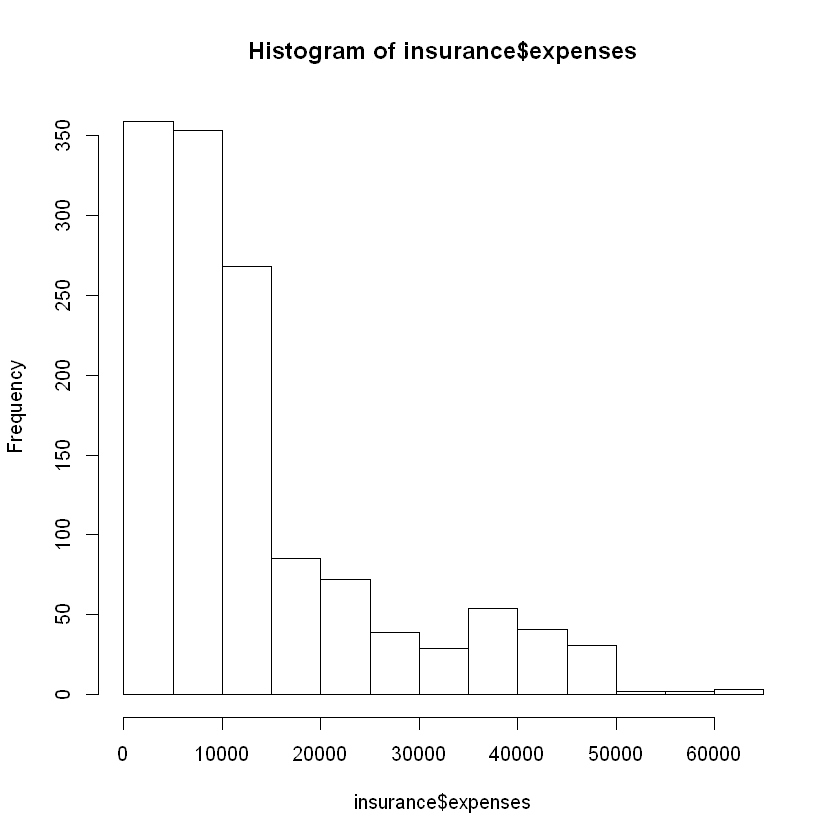

In [24]:
insurance <- read.csv("insurance.csv")
head(insurance) 

colSums(is.na(insurance)) # 결측치 확인

hist(insurance$expenses)

In [25]:
normalize <- function(x) {
  return ( (x-min(x)) / (max(x) - min(x))  ) }

insurance_n  <- as.data.frame(lapply(insurance[,c(1,3,4,7)]  ,normalize))

cor( insurance[    , c("age","bmi","children","expenses")] ) 


,age,bmi,children,expenses
age,1.0000000,0.10934101,0.04246900,0.29900819
bmi,0.1093410,1.00000000,0.01264471,0.19857626
children,0.0424690,0.01264471,1.00000000,0.06799823
expenses,0.2990082,0.19857626,0.06799823,1.00000000


#### <b>어떤 상관관계도 강하지 않은 것으로 볼 수 있지만 일부 눈에 띄는 연관성이 있음</b>
    age와 bmi는 약한 양의 상관관계를 보이고 있어서 나이가 들수록 몸무게가 증가하는 경향
    age와 expenses를 보면 양의 상관관계를 보이고 있어서 나이가 들수록 의료비가 증가하는 경향
```
    psych 패키지를 이용해서 위의 상관관계를 시각화할 수 있다
```

In [29]:
install.packages('psych')
library(psych)

Installing package into 'C:/Users/knitwill/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"dependency 'mnormt' is not available"

package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\knitwill\AppData\Local\Temp\RtmpCeSBAV\downloaded_packages


Warning message:
"package 'psych' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'psych' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'mnormt'


In [30]:
pairs.panels(insurance[c('age','bmi','children','expenses')])

ERROR: Error in pairs.panels(insurance[c("age", "bmi", "children", "expenses")]): 함수 "pairs.panels"를 찾을 수 없습니다


#### <b> 산포도에 있는 달걀 모양의 객체는 상관관계 타원형 -> 상관관계의 강도를 시각화 타원형 중심에 있는 점은 x, y축 변수에 대한 평균값 지점을 나타낸다 </b>
    타원이 늘어질수록 : 강한 상관관계
    타원이 둥글수록 : 약한 상관관계
    
#### <b> 산포도 행렬 그래프에 그려진 곡선 -> 뢰스곡선(loess curve) x축과 y축 사이에 일반적인 관계</b>
#### <b> 독립변수들의 상관관계를 통해 알 수 있는 점
    1. 나이가 많을 수록 의료비가 더 많이든다.
    2. 나이가 많을 수록 bmi(비만지수)가 더 높아진다.
    3. 중년 무렵에 부양가족수가 최고점이 된다.

In [22]:
m5 <- lm( expenses ~ age + children + bmi +smoker +region,  data=insurance)
m5

#또는
attach(insurance)
lm(expenses ~ .,  data= insurance)  

age,sex,bmi,children,smoker,region,expenses
19,female,27.9,0,yes,southwest,16884.92
18,male,33.8,1,no,southeast,1725.55
28,male,33.0,3,no,southeast,4449.46
33,male,22.7,0,no,northwest,21984.47
32,male,28.9,0,no,northwest,3866.86
31,female,25.7,0,no,southeast,3756.62


age      sex      bmi children   smoker   region expenses 
       0        0        0        0        0        0        0

,age,bmi,children,expenses
age,1.0000000,0.10934101,0.04246900,0.29900819
bmi,0.1093410,1.00000000,0.01264471,0.19857626
children,0.0424690,0.01264471,1.00000000,0.06799823
expenses,0.2990082,0.19857626,0.06799823,1.00000000



Call:
lm(formula = expenses ~ age + children + bmi + smoker + region, 
    data = insurance)

Coefficients:
    (Intercept)              age         children              bmi  
       -11993.3            257.0            474.8            338.8  
      smokeryes  regionnorthwest  regionsoutheast  regionsouthwest  
        23835.2           -352.0          -1034.9           -958.6  


The following objects are masked from insurance (pos = 3):

    age, bmi, children, expenses, region, sex, smoker




Call:
lm(formula = expenses ~ ., data = insurance)

Coefficients:
    (Intercept)              age          sexmale              bmi  
       -11941.6            256.8           -131.4            339.3  
       children        smokeryes  regionnorthwest  regionsoutheast  
          475.7          23847.5           -352.8          -1035.6  
regionsouthwest  
         -959.3  


In [21]:
insurance <- read.csv("insurance.csv")
head(insurance) 
#2. 정규화 작업을 수행한다. 
normalize <- function(x) {
      return ( (x-min(x)) / (max(x) - min(x))  ) }
insurance_n  <- as.data.frame(lapply(insurance[,c(1,3,4,7)]  ,normalize))

# 3. 독립변수와 종속변수간의 상관관계 분석 
cor( insurance[    , c("age","bmi","children","expenses")] ) 

# 4. 회귀함수인 lm 을 이용해서 독립변수들의 회귀모수를 확인한다 (기울기)
m5 <- lm( expenses ~ age + children + bmi +smoker +region,  data=insurance)

#또는
attach(insurance)
lm(expenses ~ .,  data= insurance)  

age,sex,bmi,children,smoker,region,expenses
19,female,27.9,0,yes,southwest,16884.92
18,male,33.8,1,no,southeast,1725.55
28,male,33.0,3,no,southeast,4449.46
33,male,22.7,0,no,northwest,21984.47
32,male,28.9,0,no,northwest,3866.86
31,female,25.7,0,no,southeast,3756.62


,age,bmi,children,expenses
age,1.0000000,0.10934101,0.04246900,0.29900819
bmi,0.1093410,1.00000000,0.01264471,0.19857626
children,0.0424690,0.01264471,1.00000000,0.06799823
expenses,0.2990082,0.19857626,0.06799823,1.00000000



Call:
lm(formula = expenses ~ ., data = insurance)

Coefficients:
    (Intercept)              age          sexmale              bmi  
       -11941.6            256.8           -131.4            339.3  
       children        smokeryes  regionnorthwest  regionsoutheast  
          475.7          23847.5           -352.8          -1035.6  
regionsouthwest  
         -959.3  


```
Coefficients:
    (Intercept)      age      sexmale     bmi    children  smokeryes  regionnorthwest  regionsoutheast  regionsouthwest  
       -11941.6      256.8     -131.4    339.3    475.7     23847.5       -352.8          -1035.6          -959.3

    1. 나이(age)가 1년씩 더해질 때 마다 평균적으로 연간 의료비가 $256.8 증가될 것으로 예상
    2. 자녀(children)가 한 명씩 추가될 때 마다 연간 의료비가 $475.7 추가될 것으로 예상
    3. 비만지수(bmi) 단위가 증가할 때 마다 연간 의료비가 $339.3 증가될 것으로 예상
    
    4. dummy 변수를 자동으로 추가해 변수의 값을 상대적으로 추정
        dummy 변수 : 
            sexmale : 남성은 여성에 비해 매년 의료비가 $131.4 적게 든다고 예상
            smokeryes : 흡연자는 비흡연자에 비해 매년 의료비가 $23847.5 추가될 것으로 예상
            regionnorthwest :
            regionsoutheast :
            regionsouthwest :
```


### ※ 문제263. 지역에 따른 의료비에 차이가 어떤지 회귀분석 결과를 토대로 설명하시오
```
    regionnorthwest : northeast에 비해 northwest지역은 연간 의료비가 $352.8 적게 든다고 예상
    regionsoutheast : northeast에 비해 southeast지역은 연간 의료비가 $1035.6 적게 든다고 예상
    regionsouthwest : northeast에 비해 southwest지역은 연간 의료비가 $959.3 적게 든다고 예상
```

#### <b>※ Ml 분석 5단계</b>
    1. 데이터 수집 및 데이터 설명
    2. 데이터 탐색 및 분석
    3. ML 모델 훈련
    4. 모델 성능 평가
    5. 모델 성능 개선

In [36]:
rs_m <- lm(expenses~., data=insurance)
summary(rs_m)


Call:
lm(formula = expenses ~ ., data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11302.7  -2850.9   -979.6   1383.9  29981.7 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11941.6      987.8 -12.089  < 2e-16 ***
age                256.8       11.9  21.586  < 2e-16 ***
sexmale           -131.3      332.9  -0.395 0.693255    
bmi                339.3       28.6  11.864  < 2e-16 ***
children           475.7      137.8   3.452 0.000574 ***
smokeryes        23847.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -352.8      476.3  -0.741 0.458976    
regionsoutheast  -1035.6      478.7  -2.163 0.030685 *  
regionsouthwest   -959.3      477.9  -2.007 0.044921 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.9 on 8 and 1329 DF,  p-value: < 2.2e-16


```
    Residuals:
         Min       1Q     Median     3Q      Max 
      -11302.7  -2850.9   -979.6   1383.9  29981.7 
      
    1. 모델이 최소 하나의 관측에 대해 거의 30000만 달러의 비용을 낮게 예측
    2. 오차의 50%는 -$2850 ~ 1384 사이에 있다.
```
```
    Coefficients:
                    Estimate   Std. Error   t value   Pr(>|t|)    
    (Intercept)     -11941.6      987.8     -12.089    < 2e-16 ***
    age                256.8       11.9      21.586    < 2e-16 ***
    sexmale           -131.3      332.9      -0.395   0.693255    
    bmi                339.3       28.6      11.864    < 2e-16 ***
    children           475.7      137.8       3.452   0.000574 ***
    smokeryes        23847.5      413.1      57.723    < 2e-16 ***
    regionnorthwest   -352.8      476.3      -0.741   0.458976    
    regionsoutheast  -1035.6      478.7      -2.163   0.030685 *  
    regionsouthwest   -959.3      477.9      -2.007   0.044921 *  
    ---
    Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
    
    추정된 회귀계수별로 표시된 p-value는 추정된 계수가 실제 0일 확률 추정치
    p-value가 작은 경우 실제 계수가 0이 아닐 가능성이 높다는 것. 종속변수와의 관계가 없을 가능성이 아주 낮다
    
    유의수준보다 낮은 p-value는 통계적으로 유의한 것으로 간주
    p-value가 0.05 미만으로 나온 독립변수가 유의한 변수
```
```
    p-value : 귀무가설에 얻은 검정 통계랑의 값 이상으로 대립가설에서 유리한 데이터를 얻을 수 있는 확률
        p-value > 유의수준 : 귀무가설 기각 X
        p-value < 유의수준 : 대립가설 채택
        
    옆에 나온 *이 추정치로 충족되는 유의수준을 나타내는 각주에 해당
```
<br>
Residual standard error: 6062 on 1329 degrees of freedom<br>
<b>Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 </b><br>
F-statistic: 500.9 on 8 and 1329 DF,  p-value: < 2.2e-16<br><br>


#### <b>결정계수(R-squared) : 회귀모형의 데이터에 대한 설명력을 나타내는 척도</b>
#### <b>수정된 결정계수(Adjusted R-squared) : 독립변수가 많은 회귀모형에서 penalty를 줘서 R-squared를 교정한 값 </b>
        독립변수가 많으면 결정계수가 높아져 모형의 설명력을 측정하기 좋을 수 있으나 복잡하므로 복잡성을 보완하기 위해 사용
            -> 독립변수가 많아진다고해서 무작정 커지지는 않는다.
               R-squared와 Adjusted R-squared 차이가 크면 불필요한 변수가 있을 것으로 예상할 수 있다.
```    
    좋은 회귀모형의 조건
        1. 데이터를 잘 설명
        2. 간단
```
``` 
    <면접질문>
        데이터의 종류에 따라 적합한 머신러닝 알고리즘은 무엇?
        회귀분석에서 결정계수란?
```    